# Monetary Policy Rules

*By Nathan Ramos, CFA*

Monetary policy rules are essential tools for central banks to guide their policy actions and achieve macroeconomic objectives such as stable inflation and low unemployment. This notebook serves as a comprehensive guide to three commonly used monetary policy rules: the Taylor Rule, the Balanced Approach Rule, and the First Difference Rule. By comparing these rules, we aim to understand their different approaches and implications for economic policy.

We will start by configuring your API access to the Federal Reserve Economic Data (FRED) database, configuring the system path, and importing the necessary libraries and modules for our analysis using the `pyeconomics` package.

## Configuring API Access to FRED

To leverage the real-time data fetching capabilities of the `pyeconomics` package, configure your FRED API access by [securely setting up your API key](../api_configuration/fred_api_configuration.ipynb). A detailed step-by-step guide on obtaining and securely storing your FRED API key with the `keyring` library is available in our dedicated notebook.

In [1]:
# Import standard libraries
import sys
import os

# Configure system path
sys.path.insert(0, os.path.abspath('../../'))

# Import pyeconomics modules
from pyeconomics.models.monetary_policy import calculate_historical_policy_rates
from pyeconomics.models.monetary_policy import calculate_policy_rule_estimates
from pyeconomics.models.monetary_policy import plot_historical_policy_rates
from pyeconomics.models.monetary_policy import print_fred_series_names
from pyeconomics.models.monetary_policy import print_verbose_output

## Defining Economic Data Series

To apply the monetary policy rules, we need to gather relevant economic data. The Federal Reserve Economic Data (FRED) database provides a rich source of economic data that we can use for our analysis. In this section, we define the FRED series IDs for the following economic indicators:

- **Inflation Rate**: Measured by the Trimmed Mean PCE Inflation Rate.
- **Unemployment Rate**: The general unemployment rate in the economy.
- **Natural Rate of Unemployment**: The long-term rate of unemployment determined by structural factors in the economy.
- **Real Interest Rate**: The inflation-adjusted interest rate, represented by the 10-Year Treasury Inflation-Indexed Security.

Before proceeding, ensure you have configured access to the FRED API by following the [API configuration guide](../api_configuration/fred_api_configuration.ipynb). This guide provides step-by-step instructions on obtaining and securely storing your FRED API key.

We will print the series names and their corresponding IDs to ensure that we are using the correct data for our analysis.

In [2]:
print_fred_series_names()

Inflation Series ID:               Trimmed Mean PCE Inflation Rate
Unemployment Rate Series ID:       Unemployment Rate
Natural Unemployment Series ID:    Noncyclical Rate of Unemployment
Real Interest Rate Series ID:      Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis, Inflation-Indexed


## Calculating Policy Rule Estimates Using FRED Data

In this section, we will calculate the estimates for various monetary policy rules using real-time data fetched from the FRED database. We will use the following policy rules:

- **Taylor Rule**: A widely used rule that prescribes the federal funds rate based on the inflation rate, the output gap, and the neutral interest rate.
- **Balanced Approach Rule**: Similar to the Taylor Rule but gives equal weight to stabilizing inflation and unemployment.
- **Balanced Approach (Shortfalls) Rule**: A variation of the Balanced Approach Rule that emphasizes shortfalls in employment.
- **First Difference Rule**: Focuses on changes in the federal funds rate rather than its level, reacting to deviations in inflation and unemployment from their targets.

Additionally, we will fetch and display the current Federal Funds Rate to provide a benchmark for comparison with the policy rule estimates. After calculating the estimates for each monetary policy rule, we will compile the results into a single table for easy comparison, along with a policy prescription.

In [3]:
policy_estimates = calculate_policy_rule_estimates(verbose=True)


┌───────────────────────────────────────────────────────────────────────────────────┐
│                           Interest Rate Policy Estimates                          │
├───────────────────────────────────────────────────────────────────────────────────┤
│ Taylor Rule (TR)                                                      6.17%       │
│ Balanced Approach Rule (BAR)                                          6.68%       │
│ Balanced Approach Shortfalls Rule (BASR)                              5.66%       │
│ First Difference Rule (FDR)                                           5.97%       │
├───────────────────────────────────────────────────────────────────────────────────┤
│ Federal Funds Rate (FFR)                                              5.50%       │
├───────────────────────────────────────────────────────────────────────────────────┤
│ As of Date                                                     May 21, 2024       │
├────────────────────────────────────────────────────

# Historical Policy Rule Estimates

In this section, we calculate the historical estimates for the various monetary policy rules using past data from the FRED database. By examining historical estimates, we can gain insights into how different rules would have prescribed policy actions over time under varying economic conditions. We will compile these historical estimates into a single DataFrame for comparison and analysis.

In [4]:
historical_policy_estimates = calculate_historical_policy_rates().dropna()
historical_policy_estimates.tail()

,TaylorRule,AdjustedTaylorRule,BalancedApproachRule,AdjustedBalancedApproachRule,BalancedApproachShortfallsRule,AdjustedBalancedApproachShortfallsRule,FirstDifferenceRule,AdjustedFirstDifferenceRule,FedRate
2024-05-13,6.22,6.22,6.73,6.73,5.71,5.71,5.81,5.81,5.5
2024-05-14,6.19,6.19,6.70,6.70,5.68,5.68,5.81,5.81,5.5
2024-05-15,6.12,6.12,6.63,6.63,5.61,5.61,5.81,5.81,5.5
2024-05-16,6.14,6.14,6.65,6.65,5.63,5.63,5.81,5.81,5.5
2024-05-17,6.17,6.17,6.68,6.68,5.66,5.66,5.81,5.81,5.5


## Visualizing Historical Policy Rule Estimates

To better understand the historical behavior of the different monetary policy rules, we will visualize their estimates alongside the Federal Funds Rate over time. 

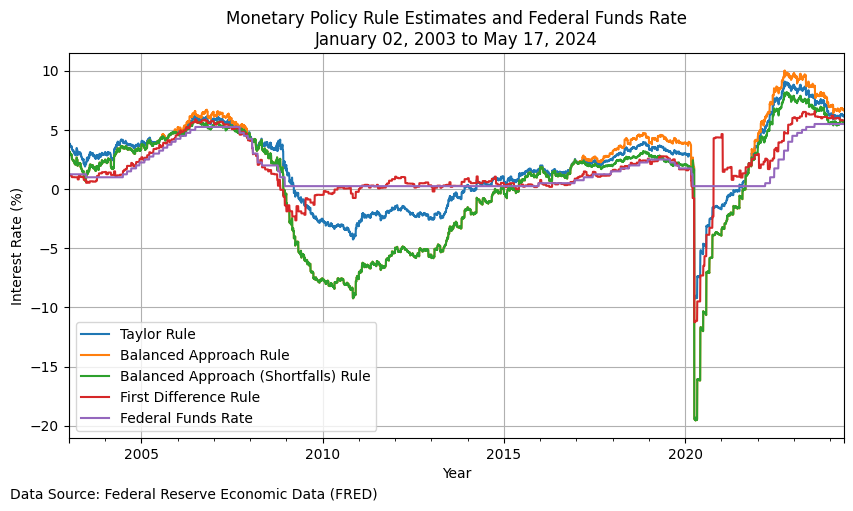

In [5]:
plot_historical_policy_rates(historical_policy_estimates)

## Adjusted Policy Rules

In this section, we will compute the monetary policy rule estimates with certain adjustments to account for policy inertia and the effective lower bound (ELB). These adjustments help us understand how the rules behave under more realistic central bank policy constraints.

### Adjustment Parameters

- **Policy Inertia (ρ)**: The policy inertia coefficient (ρ) reflects the degree to which the central bank gradually adjusts the interest rate towards the target rate prescribed by the rule. A value of 0.0 means no inertia (immediate adjustment), while a value of 1.0 means full inertia (gradual adjustment). For this analysis, we set ρ to 0.7, indicating significant but not complete inertia.
- **Effective Lower Bound (ELB)**: The ELB represents the lowest possible interest rate set by the central bank to avoid negative rates or other undesirable effects. By setting `apply_elb` to `True`, we ensure that the estimates do not fall below this lower bound.

Let's proceed to calculate the adjusted estimates for each policy rule using these parameters.

In [6]:
# Adjustment Parameters
rho = 0.7
apply_elb = True

### Calculating Adjusted Policy Rule Estimates

Using the adjustment parameters specified, we now calculate the estimates for each monetary policy rule with adjustments for policy inertia and the effective lower bound (ELB). These adjusted estimates provide a more realistic view of how central banks might implement these rules in practice.

The adjusted calculations will be performed as follows:

- **Adjusted Taylor Rule (TR)**: Incorporates policy inertia and the ELB into the Taylor Rule estimate.
- **Adjusted Balanced Approach Rule (BAR)**: Applies the same adjustments to the Balanced Approach Rule.
- **Adjusted Balanced Approach Shortfalls Rule (BASR)**: Includes the adjustments for the shortfalls-focused rule.
- **Adjusted First Difference Rule (FDR)**: Adjusts the First Difference Rule estimate accordingly.

After computing these adjusted estimates, we will compile them into a DataFrame and display the results in a formatted table for comparison with the current Federal Funds Rate (FFR), and an adjusted policy prescription.

In [7]:
adjusted_policy_estimates = calculate_policy_rule_estimates(
    rho=rho,
    apply_elb=apply_elb,
    verbose=True
)


┌───────────────────────────────────────────────────────────────────────────────────┐
│                      Adjusted Interest Rate Policy Estimates                      │
├───────────────────────────────────────────────────────────────────────────────────┤
│ Taylor Rule (TR)                                                      5.70%       │
│ Balanced Approach Rule (BAR)                                          5.86%       │
│ Balanced Approach Shortfalls Rule (BASR)                              5.55%       │
│ First Difference Rule (FDR)                                           5.64%       │
├───────────────────────────────────────────────────────────────────────────────────┤
│ Federal Funds Rate (FFR)                                              5.50%       │
├───────────────────────────────────────────────────────────────────────────────────┤
│ As of Date                                                     May 21, 2024       │
├────────────────────────────────────────────────────

## Historical Adjusted Policy Rules

In this section, we calculate the historical estimates for the various monetary policy rules with adjustments for policy inertia (ρ = 0.7) and the effective lower bound (ELB). By examining the adjusted historical estimates, we can gain insights into how these rules would have prescribed policy actions over time under more realistic central bank policy constraints.

The following historical adjusted calculations will be performed:

- **Adjusted Historical Taylor Rule Estimates**: Incorporates policy inertia and the ELB into the historical Taylor Rule estimates.
- **Adjusted Historical Balanced Approach Rule (BAR) Estimates**: Applies the same adjustments to the historical Balanced Approach Rule.
- **Adjusted Historical Balanced Approach Shortfalls Rule (BASR) Estimates**: Includes the adjustments for the shortfalls-focused rule in the historical context.
- **Adjusted Historical First Difference Rule (FDR) Estimates**: Adjusts the historical First Difference Rule estimates accordingly.

We will compile these historical adjusted estimates into a single DataFrame for comparison and analysis.

In [8]:
adjusted_historical_policy_estimates = calculate_historical_policy_rates(
    rho=rho,
    apply_elb=apply_elb
).dropna()
adjusted_historical_policy_estimates.tail()

,TaylorRule,AdjustedTaylorRule,BalancedApproachRule,AdjustedBalancedApproachRule,BalancedApproachShortfallsRule,AdjustedBalancedApproachShortfallsRule,FirstDifferenceRule,AdjustedFirstDifferenceRule,FedRate
2024-05-13,6.22,5.72,6.73,5.87,5.71,5.56,5.81,5.59,5.5
2024-05-14,6.19,5.71,6.70,5.86,5.68,5.55,5.81,5.59,5.5
2024-05-15,6.12,5.69,6.63,5.84,5.61,5.53,5.81,5.59,5.5
2024-05-16,6.14,5.69,6.65,5.85,5.63,5.54,5.81,5.59,5.5
2024-05-17,6.17,5.70,6.68,5.86,5.66,5.55,5.81,5.59,5.5


## Visualizing Historical Adjusted Policy Rule Estimates

To understand the impact of policy inertia and the effective lower bound (ELB) over time, we will visualize the historical adjusted estimates of the various monetary policy rules alongside the Federal Funds Rate. This visualization will help us compare the adjusted policy prescriptions under realistic central bank policy constraints. By examining these plots, we can gain insights into how the adjusted policy rules would have guided interest rate decisions under historical economic conditions.

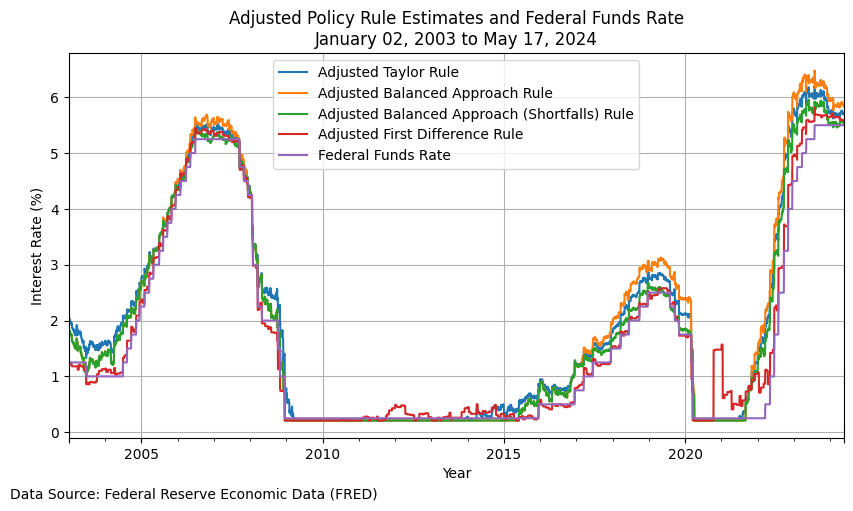

In [9]:
plot_historical_policy_rates(adjusted_historical_policy_estimates, adjusted=True)

## Sources

1. [Board of Governors of the Federal Reserve System: Policy Rules and How Policymakers Use Them](https://www.federalreserve.gov/monetarypolicy/policy-rules-and-how-policymakers-use-them.htm)
2. [Board of Governors of the Federal Reserve System: Monetary Policy Principles and Practice](https://www.federalreserve.gov/monetarypolicy/principles-for-the-conduct-of-monetary-policy.htm)
3. [Board of Governors of the Federal Reserve System: Historical Approaches to Monetary Policy](https://www.federalreserve.gov/monetarypolicy/historical-approaches-to-monetary-policy.htm)